In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)


In [ ]:
#load data
ev_charging_station_feb = 'EV_Charging_Stations_Feb82024.xlsx'
df = pd.read_excel(ev_charging_station_feb)

# Quick preview
print(df.head(3))
print(f"Dataset shape: {df.shape}")


In [ ]:
#basic information
print("\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nData types summary:")
print(df.dtypes.value_counts())

print("\nMemory usage: {:.2f} MB".format(df.memory_usage(deep=True).sum() / 1024**2))



Columns in the dataset:
 1. Station Name
 2. Street Address
 3. City
 4. State
 5. ZIP
 6. EV Level1 EVSE Num
 7. EV Level2 EVSE Num
 8. EV DC Fast Count
 9. EV Network
10. EV Connector Types
11. Access Code
12. Access Detail Code
13. Facility Type

Data types summary:
object     10
float64     3
Name: count, dtype: int64

Memory usage: 34.68 MB


In [ ]:
#missing data analysis

missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

if len(missing) > 0:
    print(f"Columns with missing values: {len(missing)}/{len(df.columns)}")
    print(missing.head(15))
else:
    print("No missing values in the dataset")


Columns with missing values: 12/13
                                Column  Missing_Count  Missing_Percent
EV Level1 EVSE Num  EV Level1 EVSE Num          64467            98.98
Access Detail Code  Access Detail Code          60210            92.44
EV DC Fast Count      EV DC Fast Count          55770            85.62
Facility Type            Facility Type          47537            72.98
EV Level2 EVSE Num  EV Level2 EVSE Num           8457            12.98
EV Connector Types  EV Connector Types             36             0.06
Street Address          Street Address             35             0.05
State                            State             14             0.02
City                              City              5             0.01
Station Name              Station Name              3             0.00
ZIP                                ZIP              1             0.00
EV Network                  EV Network              2             0.00


In [5]:
#numerical feature analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Summary statistics
df[numerical_cols].describe().round(2)


Numerical columns: ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']


,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count
count,667.00,56677.00,9364.00
mean,4.38,2.42,4.21
std,8.53,3.27,5.06
min,1.00,1.00,1.00
25%,1.00,2.00,1.00
50%,2.00,2.00,2.00
75%,4.00,2.00,6.00
max,90.00,338.00,84.00


In [ ]:
#categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Example: top 5 values for key categorical columns
key_categorical = ['State', 'City', 'Access Code', 'EV Network', 'EV Connector Types']
available_key_cats = [col for col in key_categorical if col in df.columns]

for col in available_key_cats:
    print(f"\n{col} - Top values:")
    print(df[col].value_counts().head(5))


Categorical columns: ['Station Name', 'Street Address', 'City', 'State', 'ZIP', 'EV Network', 'EV Connector Types', 'Access Code', 'Access Detail Code', 'Facility Type']

State - Top values:
State
CA    16455
NY     3975
FL     3433
TX     3190
MA     3048
Name: count, dtype: int64

City - Top values:
City
Los Angeles    1564
San Diego       712
Irvine          643
Atlanta         630
Austin          603
Name: count, dtype: int64

Access Code - Top values:
Access Code
public     61308
private     3826
Name: count, dtype: int64

EV Network - Top values:
EV Network
ChargePoint Network    33918
Non-Networked           9180
Blink Network           5528
Tesla Destination       4227
Tesla                   2157
Name: count, dtype: int64

EV Connector Types - Top values:
EV Connector Types
J1772                 50700
CHADEMO J1772COMBO     4347
TESLA                  4302
J1772 TESLA            2269
J1772COMBO             1418
Name: count, dtype: int64


/var/folders/sx/0pn1wtyd3578fh0zgkvc0_rc0000gp/T/ipykernel_252/3447412678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_networks.values, y=top_networks.index, palette='viridis')


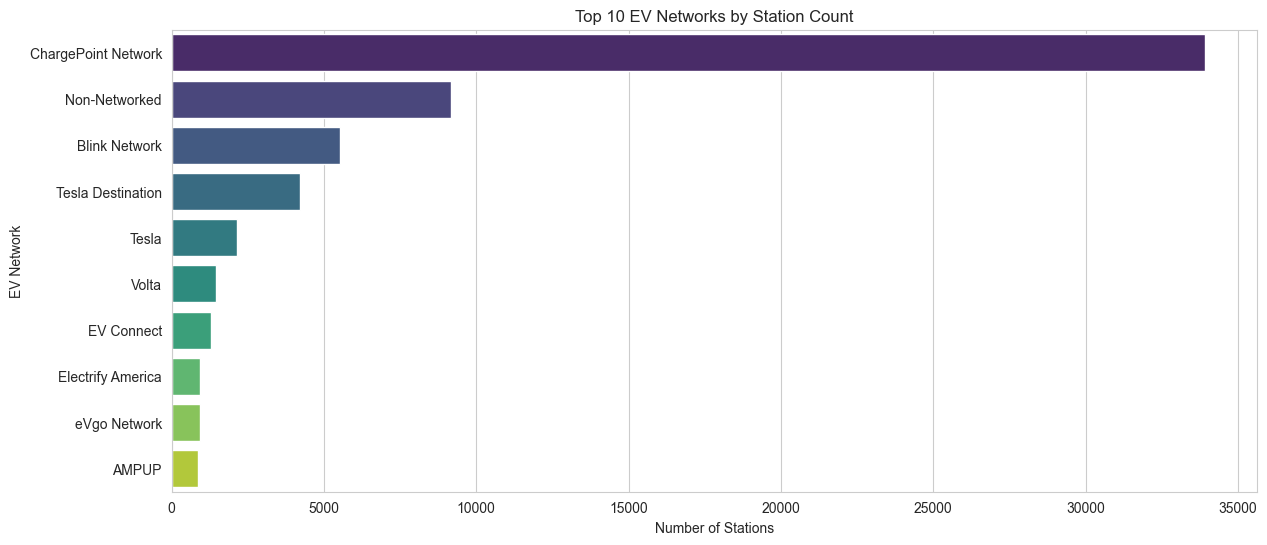

In [8]:
if 'EV Network' in df.columns:
    top_networks = df['EV Network'].value_counts().head(10)
    plt.figure()
    sns.barplot(x=top_networks.values, y=top_networks.index, palette='viridis')
    plt.title('Top 10 EV Networks by Station Count')
    plt.xlabel('Number of Stations')
    plt.ylabel('EV Network')
    plt.show()


/var/folders/sx/0pn1wtyd3578fh0zgkvc0_rc0000gp/T/ipykernel_252/1659750637.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='coolwarm')


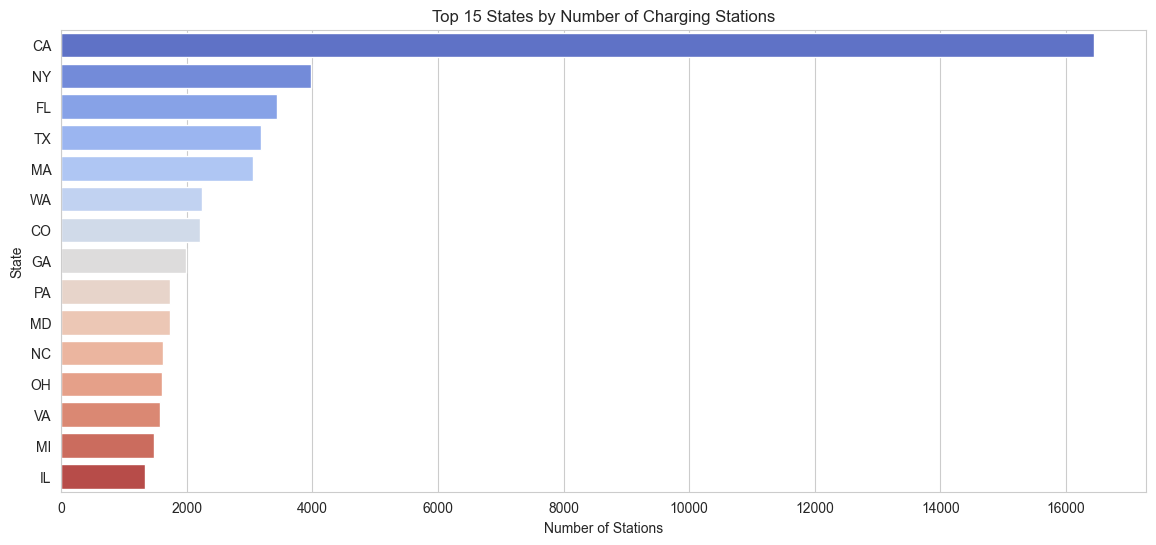

/var/folders/sx/0pn1wtyd3578fh0zgkvc0_rc0000gp/T/ipykernel_252/1659750637.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')


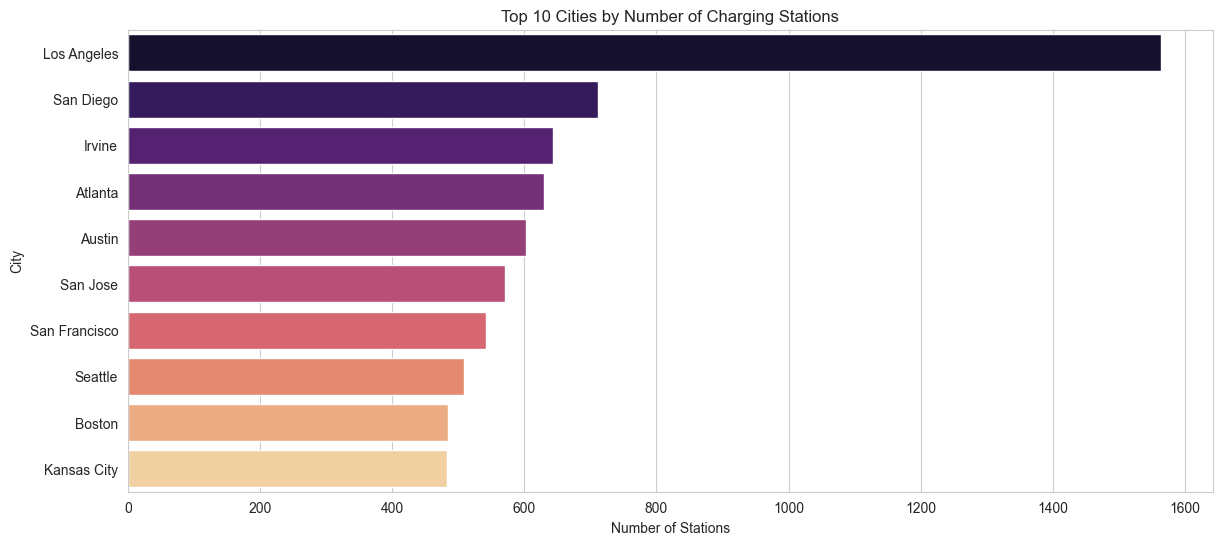

In [ ]:
#gets top 15 states and cities by number of charging stations
if 'State' in df.columns:
    state_counts = df['State'].value_counts().head(15)
    plt.figure()
    sns.barplot(x=state_counts.values, y=state_counts.index, palette='coolwarm')
    plt.title('Top 15 States by Number of Charging Stations')
    plt.xlabel('Number of Stations')
    plt.ylabel('State')
    plt.show()

if 'City' in df.columns:
    city_counts = df['City'].value_counts().head(10)
    plt.figure()
    sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')
    plt.title('Top 10 Cities by Number of Charging Stations')
    plt.xlabel('Number of Stations')
    plt.ylabel('City')
    plt.show()


/var/folders/sx/0pn1wtyd3578fh0zgkvc0_rc0000gp/T/ipykernel_252/743744058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=connector_counts.values, y=connector_counts.index, palette='plasma')


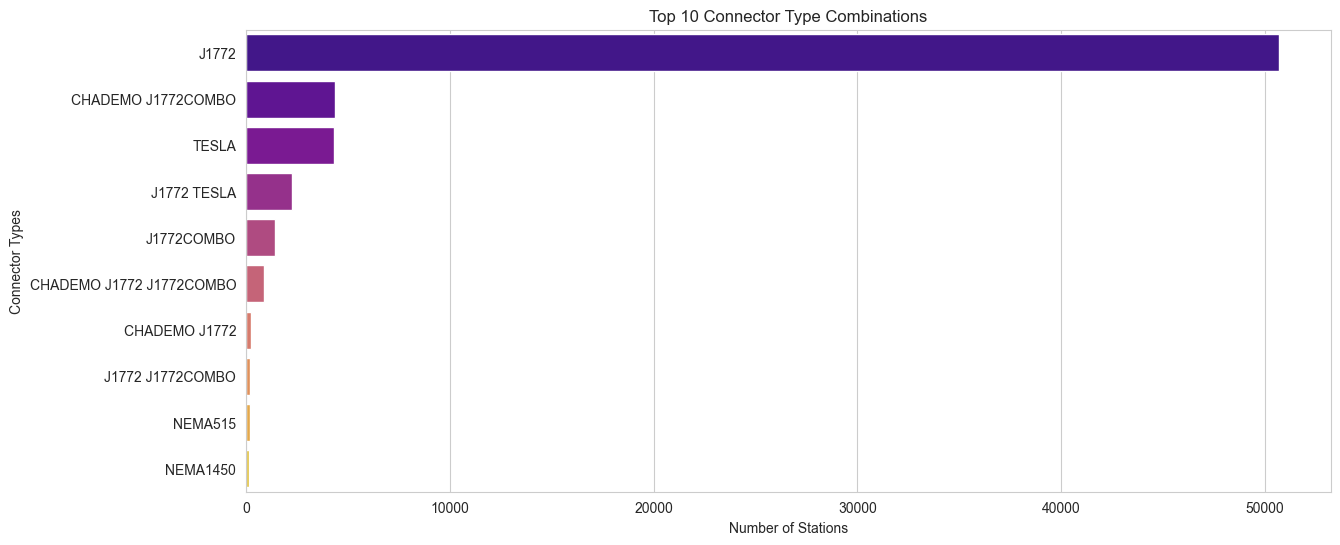

In [ ]:
if 'EV Connector Types' in df.columns:
    connector_counts = df['EV Connector Types'].value_counts().head(10)
    plt.figure()
    sns.barplot(x=connector_counts.values, y=connector_counts.index, palette='plasma')
    plt.title('Top 10 Connector Type Combinations')
    plt.xlabel('Number of Stations')
    plt.ylabel('Connector Types')
    plt.show()
